# Ex.4 Bad Points

# Part 1: a distorsion treatment.

First we propose a little study on the distorsion we meet choosing not ideal points.
For example we got a toy dataset (the code used for the kmeans is the strandard sklearn kmeans and we took inspiration from https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c article about how to do kmeans with sklearn).

First let's take the toy set.

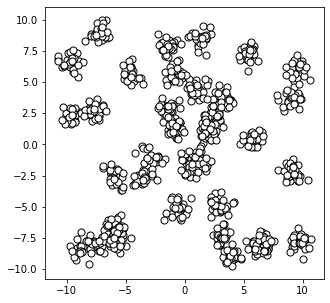

In [173]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
#I put 35v centers to make a strange dataset to cluster
# create dataset
X, y = make_blobs(
   n_samples=1000, n_features=2,
   centers=35, cluster_std=0.5,
   shuffle=True, random_state=0
)

# plot
fig = plt.figure(figsize = (5,5))
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

Now we will print first the distorsion starting from arbitrary centroids for 10 clusters, then using the usual kmeans of sklearn that takes the best on 10 trials.

In [186]:
import numpy as np
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=10, init=np.array([[0.2,1],[0.3,1],[0.4,1],[0.5,1],[0.6,1],[0.7,1],[0.8,1],[0.9,1], [0.95,1], [0.1,1]]),
    n_init=1, max_iter=300000, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)
import numpy as np
from sklearn.cluster import KMeans

km2 = KMeans(
    n_clusters=10, init= 'random',
    n_init=10000, max_iter=300000, 
    tol=1e-04, random_state=0
)
y2_km = km2.fit_predict(X)

A = km.fit(X)
B = km2.fit(X)
print(A.inertia_, B.inertia_)

5613.937023085697 4531.996922628663


Now the same on 7 clusters!

In [187]:
import numpy as np
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=7, init=np.array([[0.2,1],[0.3,1],[0.4,1],[0.5,1], [0.6,1],[0.7,1],[0.8,1]]),
    n_init=1, max_iter=300000, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)
import numpy as np
from sklearn.cluster import KMeans

km2 = KMeans(
    n_clusters=7, init= 'random',
    n_init=10000, max_iter=300000, 
    tol=1e-04, random_state=0
)
y2_km = km2.fit_predict(X)

A = km.fit(X)
B = km2.fit(X)
print(A.inertia_, B.inertia_)

7817.979996816344 7624.032273740174


And now with 4 centroids.

In [188]:
import numpy as np
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=4, init=np.array([[0.2,1],[0.3,1],[0.4,1],[0.5,1]]),
    n_init=1, max_iter=300000, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)
import numpy as np
from sklearn.cluster import KMeans

km2 = KMeans(
    n_clusters=4, init= 'random',
    n_init=10000, max_iter=300000, 
    tol=1e-04, random_state=0
)
y2_km = km2.fit_predict(X)

A = km.fit(X)
B = km2.fit(X)
print(A.inertia_, B.inertia_)

21937.454688076607 15952.976178703893


The distorsions where all kinda similar in the ranges we expected, we can check it with the elbow method.

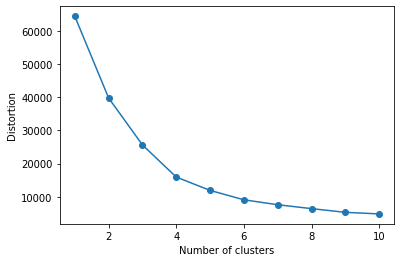

In [181]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Finally we saw that bad initialization got in vary cases a very worse distiorsion, so the cost of the kmeans would grow more arbitrarly choosing bad points that will augment the distorsion and so the loops to get to a good acceptable result.

# Part 2: Careful we got into an infinite loop!

Well we managed to make crash the algorithm with bad initialization. How?

We selected points out of max and min of the dataset so we usually got that some centroids will have no item associated, so when comparing the minimum distance the algorithm will return a cluster with the nan values as distances ( as the minimum in a vector with numbers and nan is a nan), so by this procedure the algo will just get stuck in a infinite loop that will exchange the clusters eevry time without returning anything. We tought this was a good example of bad initialization because the algo takes random centroids, and with the following code the cost will explode and the algo will not give anything if not provided of method of solution(like selecting new centers when some centroids become nan).

### We create a perfect dataframe and initialize far centroids to create a "difficult" situation for k-means (the following code is a different kmeans than in ex3, the same in practice but we wanted to show how two people in teh same group got similar but different kmeans).

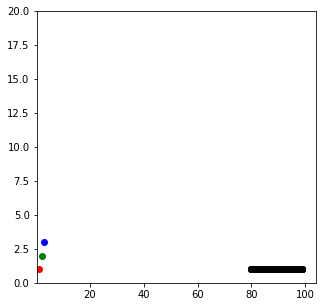

{1: [1, 1], 2: [2, 2], 3: [3, 3]}


In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
%matplotlib inline

# List of channels we want to access

df = pd.DataFrame() 
c=[]
for i in range(2):
    cc=[]
    for j in range(100):
        a=0
        if i==1:
            a=1
        else:
            a=np.random.randint(80,100)
        cc.append(a)
    c.append(cc)

df = pd.DataFrame({'f1':c[0], 'f2':c[1],})# 'f3':c[2],'f4':c[3], 'f5':c[4], 'f6':c[5]})
df
k = 3

#centroids = {
   # i+1:[np.random.uniform(0,1000), np.random.uniform(19,20)] for i in range(k)
#}
centroids = {1:[1,1], 2:[2,2], 3:[3,3]}#,4:[4,4]}
fig = plt.figure(figsize = (5,5))
plt.scatter(df['f1'], df['f2'], color = 'k')
colmap = {1 :'r', 2 : 'g', 3 : 'b', 4 : 'm'}
for i in centroids:
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0.1000)
plt.ylim(0,20)
plt.show()
print(centroids)

## Now it's time to move centroids and generate clusters.... if k-means is able!

{1: [nan, nan], 2: [nan, nan], 3: [89.64, 1.0]}


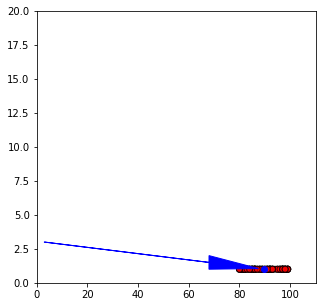

{1: [89.64, 1.0], 2: [nan, nan], 3: [nan, nan]}


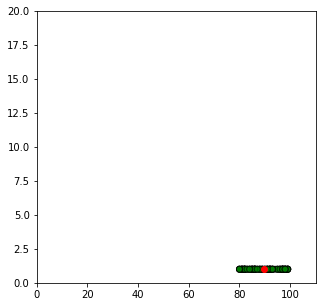

{1: [nan, nan], 2: [89.64, 1.0], 3: [nan, nan]}


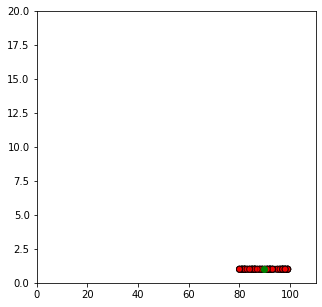

{1: [89.64, 1.0], 2: [nan, nan], 3: [nan, nan]}


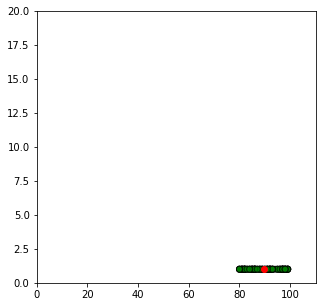

{1: [nan, nan], 2: [89.64, 1.0], 3: [nan, nan]}


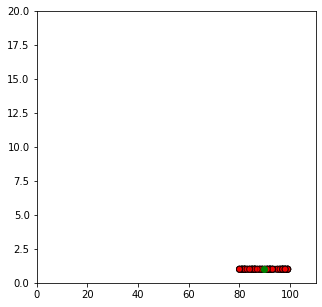

{1: [89.64, 1.0], 2: [nan, nan], 3: [nan, nan]}


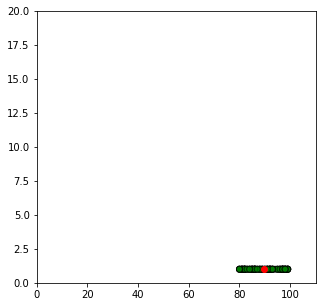

{1: [nan, nan], 2: [89.64, 1.0], 3: [nan, nan]}


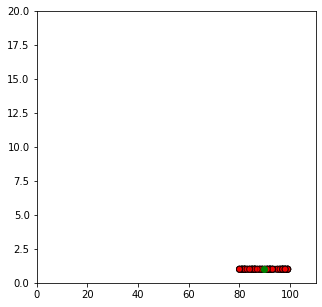

{1: [89.64, 1.0], 2: [nan, nan], 3: [nan, nan]}


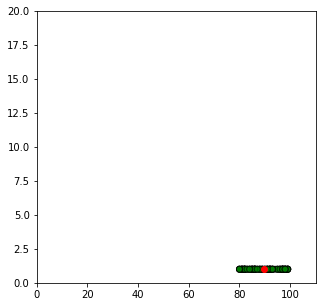

{1: [nan, nan], 2: [89.64, 1.0], 3: [nan, nan]}


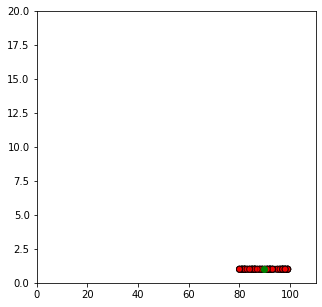

{1: [89.64, 1.0], 2: [nan, nan], 3: [nan, nan]}


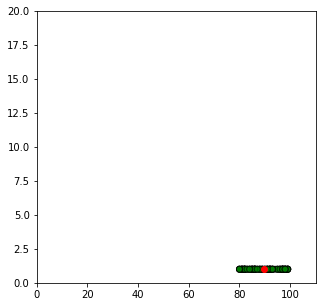

{1: [nan, nan], 2: [89.64, 1.0], 3: [nan, nan]}


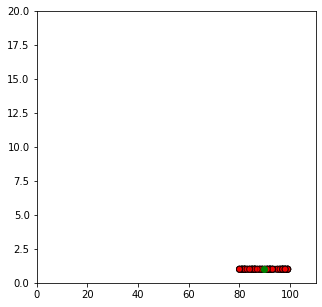

{1: [89.64, 1.0], 2: [nan, nan], 3: [nan, nan]}


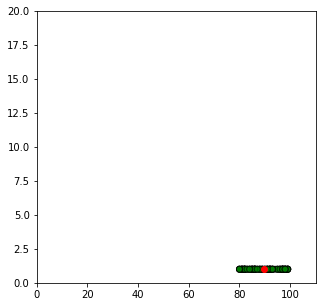

{1: [nan, nan], 2: [89.64, 1.0], 3: [nan, nan]}


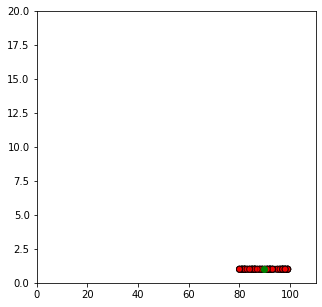

{1: [89.64, 1.0], 2: [nan, nan], 3: [nan, nan]}


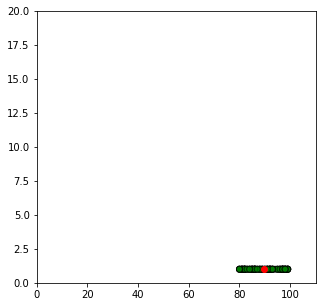

{1: [nan, nan], 2: [89.64, 1.0], 3: [nan, nan]}


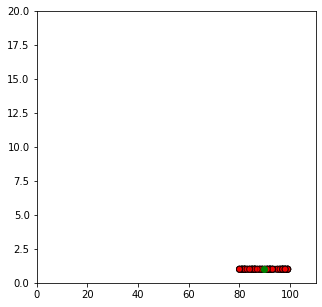

{1: [89.64, 1.0], 2: [nan, nan], 3: [nan, nan]}


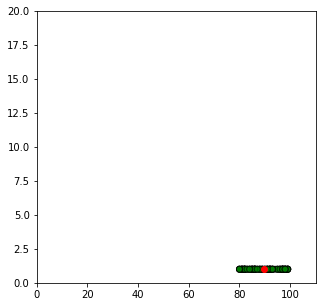

{1: [nan, nan], 2: [89.64, 1.0], 3: [nan, nan]}


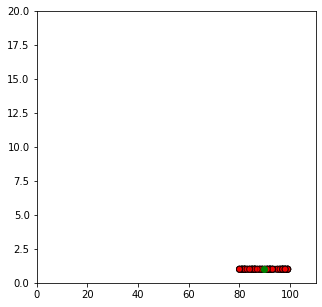

{1: [89.64, 1.0], 2: [nan, nan], 3: [nan, nan]}


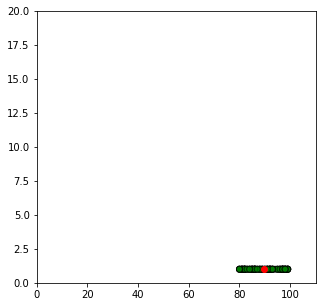

{1: [nan, nan], 2: [89.64, 1.0], 3: [nan, nan]}


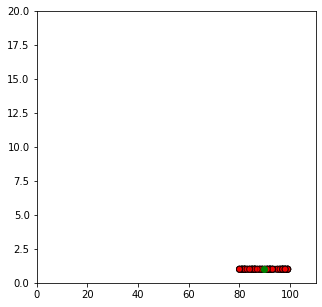

{1: [89.64, 1.0], 2: [nan, nan], 3: [nan, nan]}


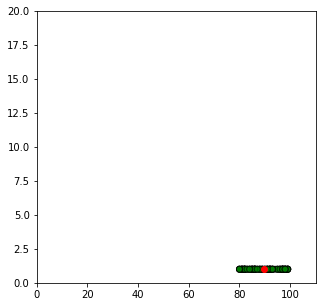

{1: [nan, nan], 2: [89.64, 1.0], 3: [nan, nan]}


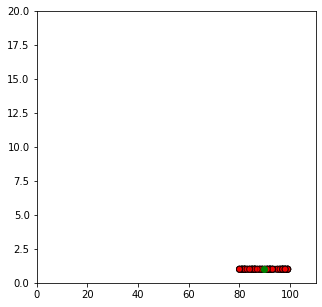

{1: [89.64, 1.0], 2: [nan, nan], 3: [nan, nan]}


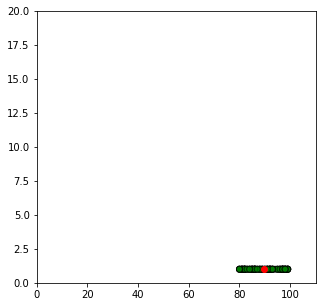

{1: [nan, nan], 2: [89.64, 1.0], 3: [nan, nan]}


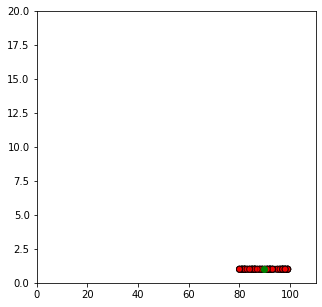

{1: [89.64, 1.0], 2: [nan, nan], 3: [nan, nan]}


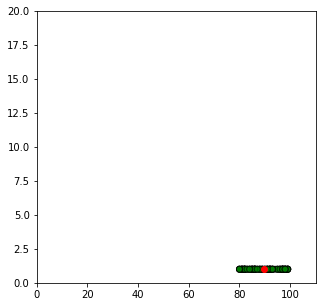

KeyboardInterrupt: 

In [194]:
def euclid(df, centroids):
    klust = []
    for i in range(len(df)):
        ds = []
        for h in range(1,k+1):
            dist = 0
            for j in range(2):
                #print(dist)
                if(centroids[h][j] == 'nan' ):
                    print('PORCAPUPAZZA')
                dist = dist + (df.loc[i][j]-centroids[h][j])**2
            dist = np.sqrt(dist)
            #if(np.isnan(dist)):
            #        print('PORCAPUPAZZA')
            ds.append(dist)
        klust.append(np.argmin(ds) + 1)
    df['clusters'] = klust
    df['color'] = df['clusters'].map(lambda x: colmap[x])
    return df
#put the first clusters
df = euclid(df, centroids)
df.head()

def new_centroids(df, centr, k):
    names = ['f1', 'f2']
    for i in range(1,k+1):
        for j in range(2):
            centr[i][j] = np.mean(df[df['clusters']==i][names[j]])
    return centr


#o = 0
while True:
    closest_centroids = df['clusters'].copy(deep=True)
    old_centroids = copy.deepcopy(centroids)
    centroids = new_centroids(df, centroids, k)
    df = euclid(df, centroids)
    print(centroids)
    if closest_centroids.equals(df['clusters']):
        print('yeeeeeee')
        break   
    fig = plt.figure(figsize = (5,5))
    ax = plt.axes()
    colmap = {1 :'r', 2 : 'g', 3 : 'b', 4 : 'm'}
    plt.scatter(df['f1'], df['f2'], alpha = 0.7, color = df['color'], edgecolor = 'k')
    for i in centroids:
        plt.scatter(*centroids[i], color = colmap[i])
    plt.xlim(0,110)
    plt.ylim(0,20)
    old = []
    for i in old_centroids.keys():
        l = []
        for j in range(0,2):
            l.append(old_centroids[i][j])
        old.append(l)
        dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
        dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
        ax.arrow(old[i-1][0], old[i-1][1], dx, dy, head_width=1, head_length=np.sqrt(dx**2+dy**2)*0.3, fc=colmap[i], ec=colmap[i])
    plt.show()

# So our point was clear with bad initialization the kmeans can go really wild ( for sure a better kmeans will take care of this anomalies andb that's why there are many kind of kmeans implementations).